In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects


file_path = r"E:\Projects\Gamezone Orders Data\product_performance.csv"
df = pd.read_csv(
    file_path
)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_name_cleaned  8 non-null      object 
 1   total_revenue         8 non-null      float64
 2   total_orders          8 non-null      int64  
 3   avg_price             8 non-null      float64
 4   total_customers       8 non-null      int64  
 5   repeat_buyers         8 non-null      float64
 6   rpr_%                 8 non-null      float64
 7   revenue_%_of_total    8 non-null      float64
 8   cumulative_revenue_%  8 non-null      float64
 9   revenue_per_order     8 non-null      float64
 10  abc_class             8 non-null      object 
dtypes: float64(7), int64(2), object(2)
memory usage: 836.0+ bytes


In [6]:
df

,product_name_cleaned,total_revenue,total_orders,avg_price,total_customers,repeat_buyers,rpr_%,revenue_%_of_total,cumulative_revenue_%,revenue_per_order,abc_class
0,27in 4k gaming monitor,1968565.34,4723,417.511207,4358,354.0,8.12,32.00,32.00,416.80,A
1,nintendo switch,1658717.65,10386,159.707072,9686,677.0,6.99,26.97,58.97,159.71,A
2,sony playstation 5 bundle,1589243.85,977,1626.656960,900,76.0,8.44,25.84,84.81,1626.66,B
3,lenovo ideapad gaming 3,735506.56,669,1099.411898,617,51.0,8.27,11.96,96.77,1099.41,C
4,jbl quantum 100 gaming headset,96197.67,4296,22.502379,4025,262.0,6.51,1.56,98.33,22.39,C
5,acer nitro v gaming laptop,65661.18,87,754.726207,78,9.0,11.54,1.07,99.40,754.73,C
6,dell gaming mouse,36490.01,719,51.106457,647,71.0,10.97,0.59,99.99,50.75,C
7,razer pro gaming headset,884.23,7,126.318571,7,0.0,0.00,0.01,100.00,126.32,C


In [7]:
print(df.columns.tolist())


['product_name_cleaned', 'total_revenue', 'total_orders', 'avg_price', 'total_customers', 'repeat_buyers', 'rpr_%', 'revenue_%_of_total', 'cumulative_revenue_%', 'revenue_per_order', 'abc_class']


Columns: ['product_name_cleaned', 'total_revenue', 'total_orders', 'avg_price', 'total_customers', 'repeat_buyers', 'rpr_%', 'revenue_%_of_total', 'cumulative_revenue_%', 'revenue_per_order', 'abc_class']
Rows after cleaning: 8


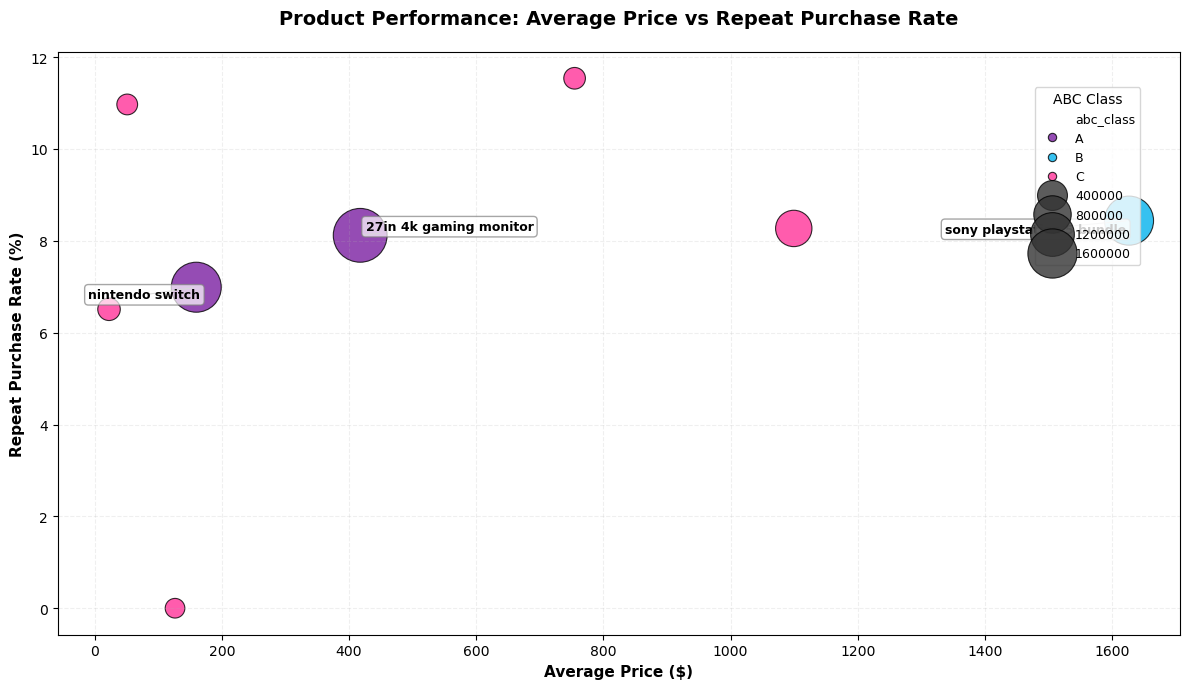

In [36]:
"""
Product Performance Analysis: Bubble Chart Visualization
Creates a scatter plot showing the relationship between price, repeat purchase rate,
and revenue across ABC product classes.
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Optional
from adjustText import adjust_text  # install via: pip install adjustText


def clean_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    """
    Clean and standardize dataframe column names.
    
    Args:
        df: Input dataframe
        
    Returns:
        Dataframe with cleaned column names
    """
    df_clean = df.copy()
    df_clean.columns = df_clean.columns.str.strip().str.lower()
    return df_clean


def validate_columns(df: pd.DataFrame, required_cols: List[str]) -> None:
    """
    Validate that required columns exist in the dataframe.
    
    Args:
        df: Input dataframe
        required_cols: List of required column names
        
    Raises:
        ValueError: If any required columns are missing
    """
    missing = [col for col in required_cols if col not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns: {missing}")


def create_bubble_chart(
    df: pd.DataFrame,
    x_col: str = 'avg_price',
    y_col: str = 'rpr_%',
    size_col: str = 'total_revenue',
    hue_col: str = 'abc_class',
    label_col: str = 'product_name_cleaned',
    palette: Optional[Dict[str, str]] = None,
    top_n: int = 3,
    figsize: tuple = (12, 7),
    save_path: Optional[str] = None
) -> plt.Figure:
    """
    Create a bubble chart for product performance analysis.
    """
    # Default color palette
    if palette is None:
        palette = {
            'A': '#7B1FA2',  # purple
            'B': '#03b2ed',  # blue
            'C': '#FF3399'   # pink
        }
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)

    # Create scatter plot
    scatter = sns.scatterplot(
        data=df,
        x=x_col,
        y=y_col,
        size=size_col,
        hue=hue_col,
        palette=palette,
        sizes=(200, 1500),
        alpha=0.8,
        edgecolor='black',
        linewidth=0.8,
        ax=ax
    )

    # Remove the "total_revenue" legend (auto-created by Seaborn for bubble size)
    handles, labels = ax.get_legend_handles_labels()
    new_handles = []
    new_labels = []
    for h, l in zip(handles, labels):
        if not ("total_revenue" in l.lower() or "size" in l.lower()):
            new_handles.append(h)
            new_labels.append(l)

    # Add custom legend for ABC class inside chart
    legend = ax.legend(
        new_handles,
        new_labels,
        title="ABC Class",
        loc="upper right",
        frameon=True,
        shadow=False,
        fontsize=9,
        title_fontsize=10,
        bbox_to_anchor=(0.97, 0.95)
    )

    # Annotate top N products by revenue
    top_products = df.nlargest(top_n, size_col)
    texts = []
    for _, row in top_products.iterrows():
        texts.append(
            ax.text(
                row[x_col],
                row[y_col],
                row[label_col],
                fontsize=9,
                weight='bold',
                color='black',
                ha='center',
                va='center',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white',
                          edgecolor='gray', alpha=0.7)
            )
        )

    # Adjust labels to prevent overlap
    adjust_text(
        texts,
        only_move={'points': 'y', 'texts': 'y'},
        arrowprops=dict(arrowstyle='-', color='gray', lw=0.7),
        ax=ax
    )

    # Chart styling
    ax.set_title(
        "Product Performance: Average Price vs Repeat Purchase Rate",
        fontsize=14, fontweight='bold', pad=20
    )
    ax.set_xlabel("Average Price ($)", fontsize=11, fontweight='bold')
    ax.set_ylabel("Repeat Purchase Rate (%)", fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.2, linestyle='--')
    ax.set_facecolor('white')

    plt.tight_layout()

    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Figure saved to: {save_path}")

    return fig


def main(df: pd.DataFrame) -> None:
    """
    Main execution function for product performance analysis.
    
    Args:
        df: Input dataframe with product data
    """
    # Clean data
    df_clean = clean_dataframe(df)
    print("Columns:", df_clean.columns.tolist())
    
    # Validate required columns
    required_cols = ['avg_price', 'rpr_%', 'total_revenue', 
                     'abc_class', 'product_name_cleaned']
    validate_columns(df_clean, required_cols)
    
    # Remove any rows with missing values in key columns
    df_clean = df_clean.dropna(subset=required_cols)
    print(f"Rows after cleaning: {len(df_clean)}")
    
    # Create visualization
    fig = create_bubble_chart(
        df_clean,
        top_n=3,
        # save_path='product_performance.png'  # Uncomment to save
    )
    
    plt.show()


# --- Usage Example ---
if __name__ == "__main__":
    # Example:
    # df = pd.read_csv('your_data.csv')
    main(df)


Columns: ['product_name_cleaned', 'total_revenue', 'total_orders', 'avg_price', 'total_customers', 'repeat_buyers', 'rpr_%', 'revenue_%_of_total', 'cumulative_revenue_%', 'revenue_per_order', 'abc_class']
Rows after cleaning: 8


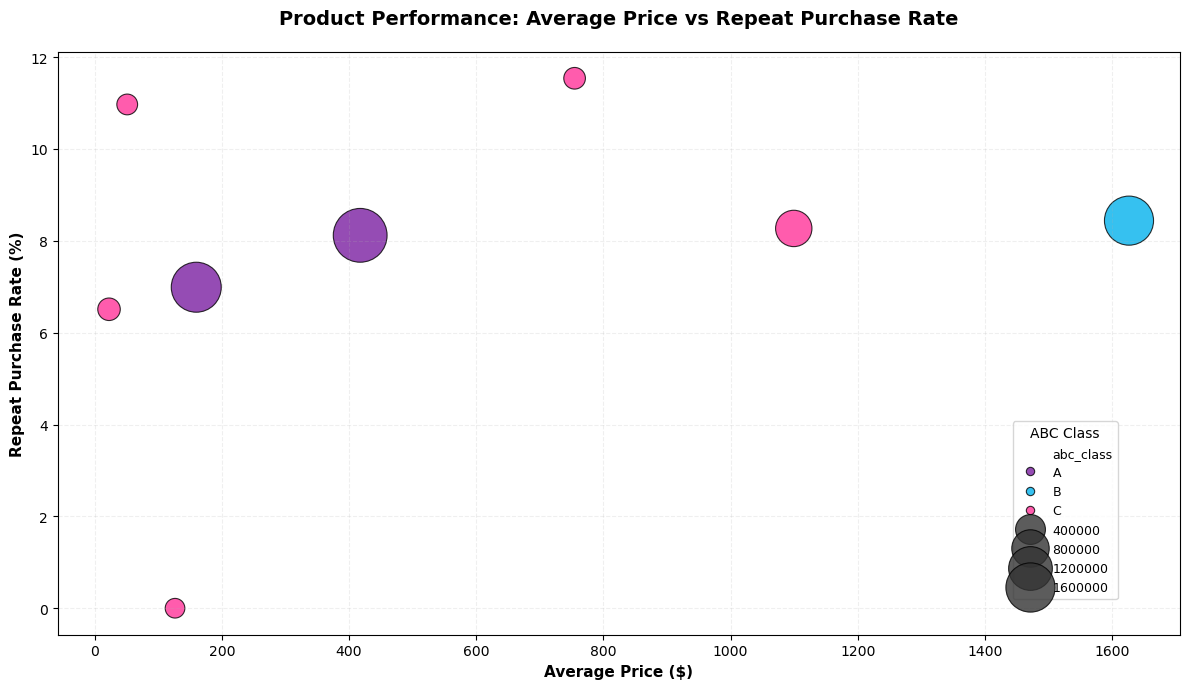

In [37]:
"""
Product Performance Analysis: Bubble Chart Visualization
Creates a scatter plot showing the relationship between price, repeat purchase rate,
and revenue across ABC product classes.
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Optional
from adjustText import adjust_text  # install via: pip install adjustText


def clean_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    """
    Clean and standardize dataframe column names.
    
    Args:
        df: Input dataframe
        
    Returns:
        Dataframe with cleaned column names
    """
    df_clean = df.copy()
    df_clean.columns = df_clean.columns.str.strip().str.lower()
    return df_clean


def validate_columns(df: pd.DataFrame, required_cols: List[str]) -> None:
    """
    Validate that required columns exist in the dataframe.
    
    Args:
        df: Input dataframe
        required_cols: List of required column names
        
    Raises:
        ValueError: If any required columns are missing
    """
    missing = [col for col in required_cols if col not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns: {missing}")


def create_bubble_chart(
    df: pd.DataFrame,
    x_col: str = 'avg_price',
    y_col: str = 'rpr_%',
    size_col: str = 'total_revenue',
    hue_col: str = 'abc_class',
    label_col: str = 'product_name_cleaned',
    palette: Optional[Dict[str, str]] = None,
    top_n: int = 3,
    figsize: tuple = (12, 7),
    save_path: Optional[str] = None
) -> plt.Figure:
    """
    Create a bubble chart for product performance analysis.
    """
    # Default color palette
    if palette is None:
        palette = {
            'A': '#7B1FA2',  # purple
            'B': '#03b2ed',  # blue
            'C': '#FF3399'   # pink
        }
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)

    # Create scatter plot
    scatter = sns.scatterplot(
        data=df,
        x=x_col,
        y=y_col,
        size=size_col,
        hue=hue_col,
        palette=palette,
        sizes=(200, 1500),
        alpha=0.8,
        edgecolor='black',
        linewidth=0.8,
        ax=ax
    )

    # Remove the "total_revenue" legend (auto-created by Seaborn for bubble size)
    handles, labels = ax.get_legend_handles_labels()
    new_handles = []
    new_labels = []
    for h, l in zip(handles, labels):
        if not ("total_revenue" in l.lower() or "size" in l.lower()):
            new_handles.append(h)
            new_labels.append(l)

    # Add custom legend for ABC class inside bottom right
    legend = ax.legend(
        new_handles,
        new_labels,
        title="ABC Class",
        loc="lower right",
        frameon=True,
        shadow=False,
        fontsize=9,
        title_fontsize=10,
        bbox_to_anchor=(0.95, 0.05)
    )

    # --- Labels REMOVED ---
    # (No annotation or adjust_text block)

    # Chart styling
    ax.set_title(
        "Product Performance: Average Price vs Repeat Purchase Rate",
        fontsize=14, fontweight='bold', pad=20
    )
    ax.set_xlabel("Average Price ($)", fontsize=11, fontweight='bold')
    ax.set_ylabel("Repeat Purchase Rate (%)", fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.2, linestyle='--')
    ax.set_facecolor('white')

    plt.tight_layout()

    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Figure saved to: {save_path}")

    return fig


def main(df: pd.DataFrame) -> None:
    """
    Main execution function for product performance analysis.
    
    Args:
        df: Input dataframe with product data
    """
    # Clean data
    df_clean = clean_dataframe(df)
    print("Columns:", df_clean.columns.tolist())
    
    # Validate required columns
    required_cols = ['avg_price', 'rpr_%', 'total_revenue', 
                     'abc_class', 'product_name_cleaned']
    validate_columns(df_clean, required_cols)
    
    # Remove any rows with missing values in key columns
    df_clean = df_clean.dropna(subset=required_cols)
    print(f"Rows after cleaning: {len(df_clean)}")
    
    # Create visualization
    fig = create_bubble_chart(
        df_clean,
        top_n=3,
        # save_path='product_performance.png'  # Uncomment to save
    )
    
    plt.show()


# --- Usage Example ---
if __name__ == "__main__":
    # Example:
    # df = pd.read_csv('your_data.csv')
    main(df)


Columns: ['product_name_cleaned', 'total_revenue', 'total_orders', 'avg_price', 'total_customers', 'repeat_buyers', 'rpr_%', 'revenue_%_of_total', 'cumulative_revenue_%', 'revenue_per_order', 'abc_class', 'color']
Rows after cleaning: 8


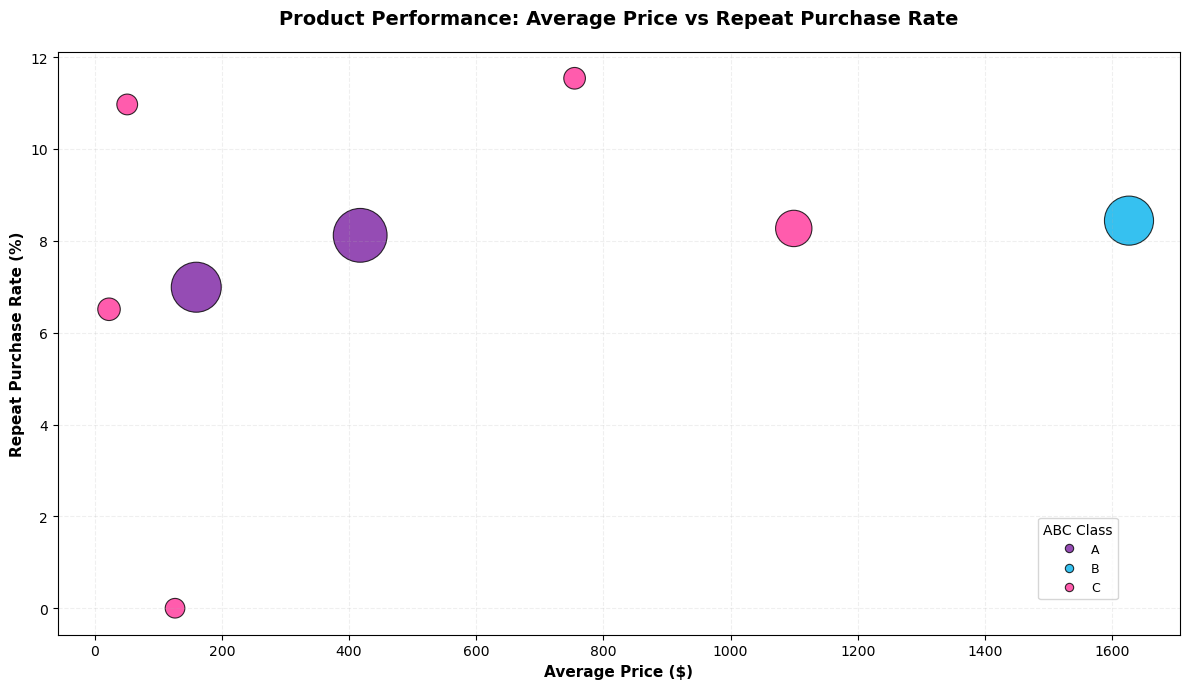

In [47]:
"""
Product Performance Analysis: Bubble Chart Visualization
Creates a scatter plot showing the relationship between price, repeat purchase rate,
and revenue across ABC product classes.
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Optional


def validate_columns(df: pd.DataFrame, required_cols: List[str]) -> None:
    """
    Validate that required columns exist in the dataframe.
    """
    missing = [col for col in required_cols if col not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns: {missing}")


def create_bubble_chart(
    df: pd.DataFrame,
    x_col: str = 'avg_price',
    y_col: str = 'rpr_%',
    size_col: str = 'total_revenue',
    hue_col: str = 'abc_class',
    label_col: str = 'product_name_cleaned',
    palette: Optional[Dict[str, str]] = None,
    top_n: int = 3,
    figsize: tuple = (12, 7),
    save_path: Optional[str] = None
) -> plt.Figure:
    """
    Create a bubble chart for product performance analysis.
    """
    # Default color palette
    if palette is None:
        palette = {
            'A': '#7B1FA2',  # purple
            'B': '#03b2ed',  # blue
            'C': '#FF3399'   # pink
        }
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)

    # Create scatter plot
    scatter = sns.scatterplot(
        data=df,
        x=x_col,
        y=y_col,
        size=size_col,
        hue=hue_col,
        palette=palette,
        sizes=(200, 1500),
        alpha=0.8,
        edgecolor='black',
        linewidth=0.8,
        ax=ax
    )

    # Keep only ABC class in legend (remove revenue/size)
    handles, labels = ax.get_legend_handles_labels()
    filtered = [(h, l) for h, l in zip(handles, labels) if l in ['A', 'B', 'C']]
    new_handles, new_labels = zip(*filtered)

    # Add custom legend for ABC class inside bottom right
    legend = ax.legend(
        new_handles,
        new_labels,
        title="ABC Class",
        loc="lower right",
        frameon=True,
        shadow=False,
        fontsize=9,
        title_fontsize=10,
        bbox_to_anchor=(0.95, 0.05)
    )

    # --- Labels REMOVED ---
    # (No annotation or adjust_text block)

    # Chart styling
    ax.set_title(
        "Product Performance: Average Price vs Repeat Purchase Rate",
        fontsize=14, fontweight='bold', pad=20
    )
    ax.set_xlabel("Average Price ($)", fontsize=11, fontweight='bold')
    ax.set_ylabel("Repeat Purchase Rate (%)", fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.2, linestyle='--')
    ax.set_facecolor('white')

    plt.tight_layout()

    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Figure saved to: {save_path}")

    return fig


def main(df: pd.DataFrame) -> None:
    """
    Main execution function for product performance analysis.
    """
    print("Columns:", df.columns.tolist())
    
    # Validate required columns
    required_cols = ['avg_price', 'rpr_%', 'total_revenue', 
                     'abc_class', 'product_name_cleaned']
    validate_columns(df, required_cols)
    
    # Remove any rows with missing values in key columns
    df = df.dropna(subset=required_cols)
    print(f"Rows after cleaning: {len(df)}")
    
    # Create visualization
    fig = create_bubble_chart(
        df,
        top_n=3,
        # save_path='product_performance.png'  # Uncomment to save
    )
    
    plt.show()


# --- Usage Example ---
if __name__ == "__main__":
    # Example:
    # df = pd.read_csv('your_data.csv')  # already cleaned
    main(df)


C:\Users\shaif\AppData\Local\Temp\ipykernel_18312\1983876852.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_df['product_name_cleaned'], rotation=45, ha='right', fontsize=10)


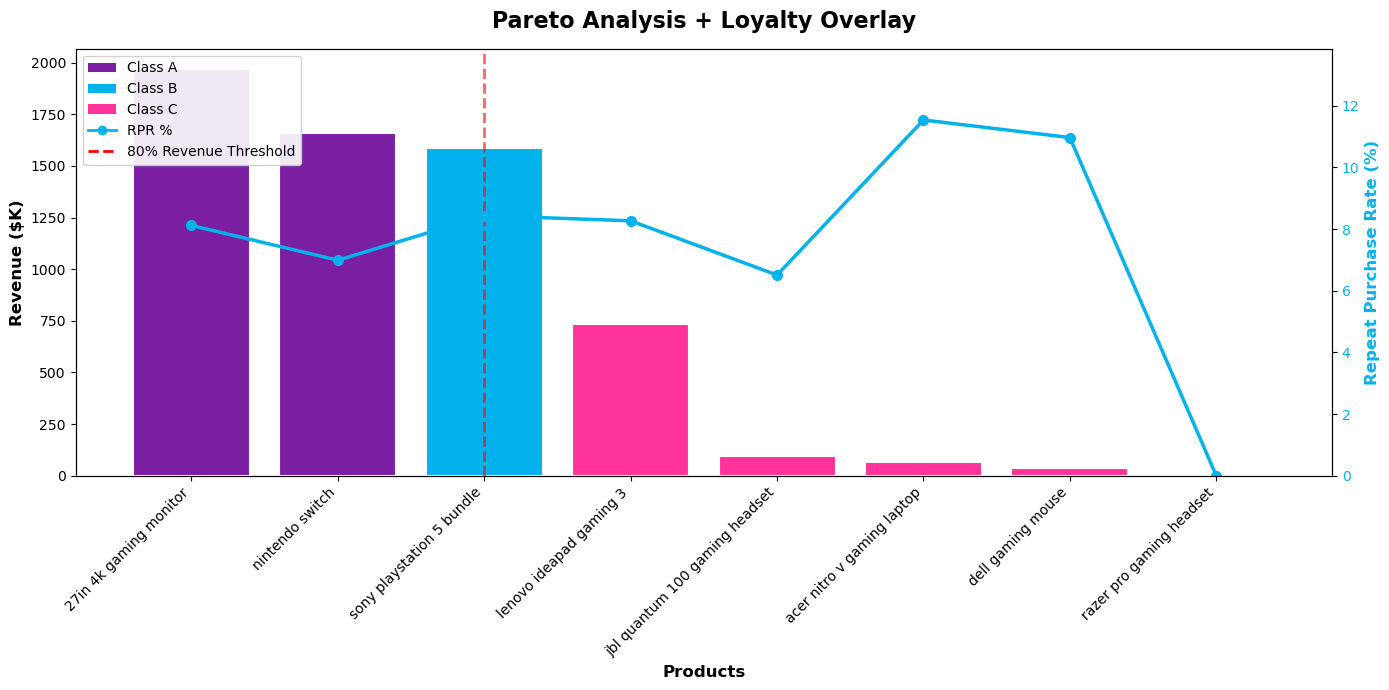

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Sort by total revenue
sorted_df = df.sort_values('total_revenue', ascending=False).reset_index(drop=True)

# Custom colors for ABC classes (mapping: A, B, C → your palette)
abc_colors_palette = ["#7B1FA2", "#03b2ed", "#FF3399"]  # A=purple, B=blue, C=pink
abc_color_map = {'A': abc_colors_palette[0], 'B': abc_colors_palette[1], 'C': abc_colors_palette[2]}
colors = [abc_color_map[c] for c in sorted_df['abc_class']]

# Create figure
fig, ax1 = plt.subplots(figsize=(14, 7))

# --- Bar chart: Total Revenue ---
bars = ax1.bar(
    sorted_df['product_name_cleaned'],
    sorted_df['total_revenue']/1000,  # in $K
    color=colors,
    edgecolor='white',
    linewidth=1.5
)
ax1.set_ylabel('Revenue ($K)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Products', fontsize=12, fontweight='bold')
ax1.set_xticklabels(sorted_df['product_name_cleaned'], rotation=45, ha='right', fontsize=10)

# --- Line chart: RPR% ---
ax2 = ax1.twinx()
ax2.plot(
    sorted_df['product_name_cleaned'],
    sorted_df['rpr_%'],
    color='#03b2ed',  # blue line for RPR
    marker='o',
    linewidth=2.5,
    markersize=7,
    label='RPR %'
)
ax2.set_ylabel('Repeat Purchase Rate (%)', color='#03b2ed', fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='#03b2ed')
ax2.set_ylim(0, max(sorted_df['rpr_%'].max()*1.2, 10))

# --- Add 80% cumulative revenue threshold as vertical line ---
threshold_idx = np.argmax(sorted_df['cumulative_revenue_%'] >= 80)
ax1.axvline(x=threshold_idx, color='red', linestyle='--', linewidth=2, alpha=0.6, label='80% Revenue Threshold')

# --- Legend ---
legend_elements = [
    Patch(facecolor=abc_colors_palette[0], label='Class A'),
    Patch(facecolor=abc_colors_palette[1], label='Class B'),
    Patch(facecolor=abc_colors_palette[2], label='Class C'),
    plt.Line2D([0], [0], color='#03b2ed', marker='o', linewidth=2, label='RPR %'),
    plt.Line2D([0], [0], color='red', linestyle='--', linewidth=2, label='80% Revenue Threshold')
]
ax1.legend(handles=legend_elements, loc='upper left', fontsize=10, framealpha=0.9)

# --- Title & Layout ---
plt.title('Pareto Analysis + Loyalty Overlay', fontsize=16, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()


C:\Users\shaif\AppData\Local\Temp\ipykernel_18312\2889038434.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_df['product_name_cleaned'], rotation=45, ha='right', fontsize=10)


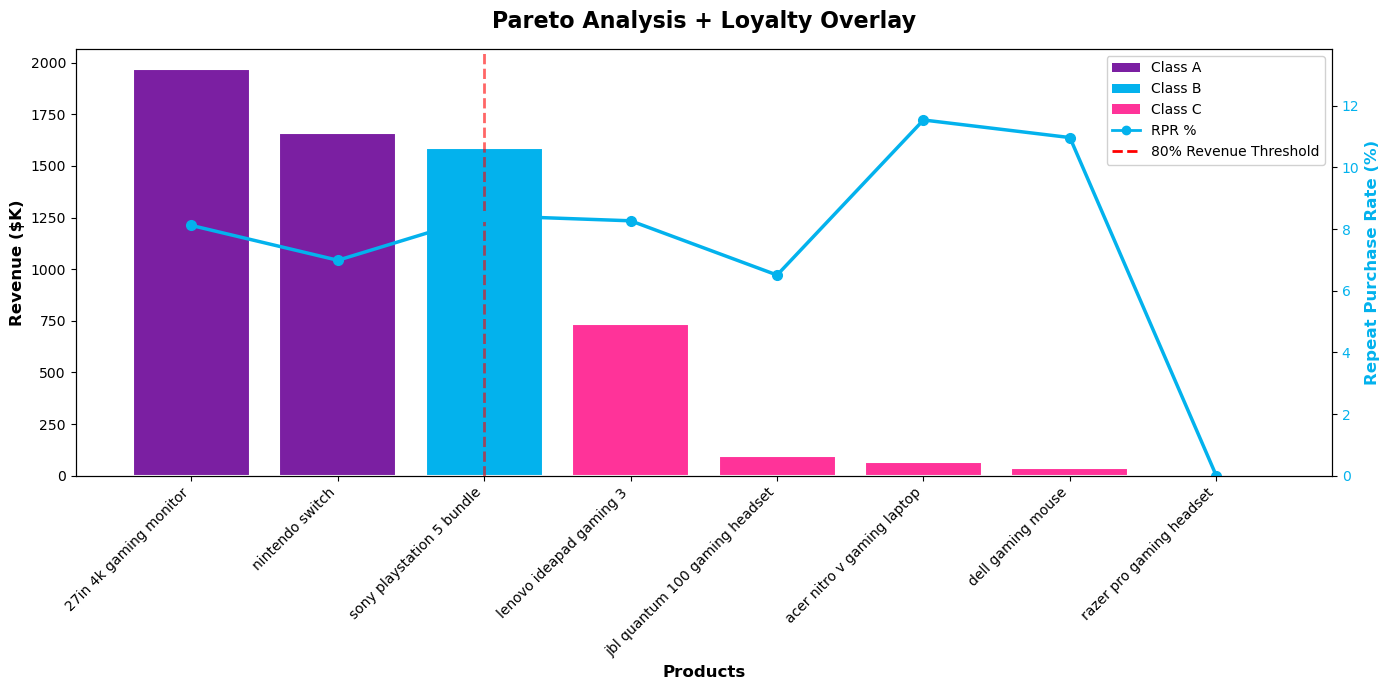

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Sort by total revenue
sorted_df = df.sort_values('total_revenue', ascending=False).reset_index(drop=True)

# Custom colors for ABC classes
abc_colors_palette = ["#7B1FA2", "#03b2ed", "#FF3399"]  # A=purple, B=blue, C=pink
abc_color_map = {'A': abc_colors_palette[0], 'B': abc_colors_palette[1], 'C': abc_colors_palette[2]}
colors = [abc_color_map[c] for c in sorted_df['abc_class']]

# Create figure
fig, ax1 = plt.subplots(figsize=(14, 7))

# --- Bar chart: Total Revenue ---
bars = ax1.bar(
    sorted_df['product_name_cleaned'],
    sorted_df['total_revenue']/1000,  # in $K
    color=colors,
    edgecolor='white',
    linewidth=1.5
)
ax1.set_ylabel('Revenue ($K)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Products', fontsize=12, fontweight='bold')
ax1.set_xticklabels(sorted_df['product_name_cleaned'], rotation=45, ha='right', fontsize=10)

# --- Line chart: RPR% ---
ax2 = ax1.twinx()
ax2.plot(
    sorted_df['product_name_cleaned'],
    sorted_df['rpr_%'],
    color='#03b2ed',  # blue line for RPR
    marker='o',
    linewidth=2.5,
    markersize=7,
    label='RPR %'
)
ax2.set_ylabel('Repeat Purchase Rate (%)', color='#03b2ed', fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='#03b2ed')
ax2.set_ylim(0, max(sorted_df['rpr_%'].max()*1.2, 10))

# --- Add 80% cumulative revenue threshold as vertical line ---
threshold_idx = np.argmax(sorted_df['cumulative_revenue_%'] >= 80)
ax1.axvline(x=threshold_idx, color='red', linestyle='--', linewidth=2, alpha=0.6, label='80% Revenue Threshold')

# --- Legend (Top Right) ---
legend_elements = [
    Patch(facecolor=abc_colors_palette[0], label='Class A'),
    Patch(facecolor=abc_colors_palette[1], label='Class B'),
    Patch(facecolor=abc_colors_palette[2], label='Class C'),
    plt.Line2D([0], [0], color='#03b2ed', marker='o', linewidth=2, label='RPR %'),
    plt.Line2D([0], [0], color='red', linestyle='--', linewidth=2, label='80% Revenue Threshold')
]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=10, framealpha=0.9)

# --- Title & Layout ---
plt.title('Pareto Analysis + Loyalty Overlay', fontsize=16, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()


C:\Users\shaif\AppData\Local\Temp\ipykernel_18312\811646063.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_df['product_name_cleaned'], rotation=45, ha='right', fontsize=10)


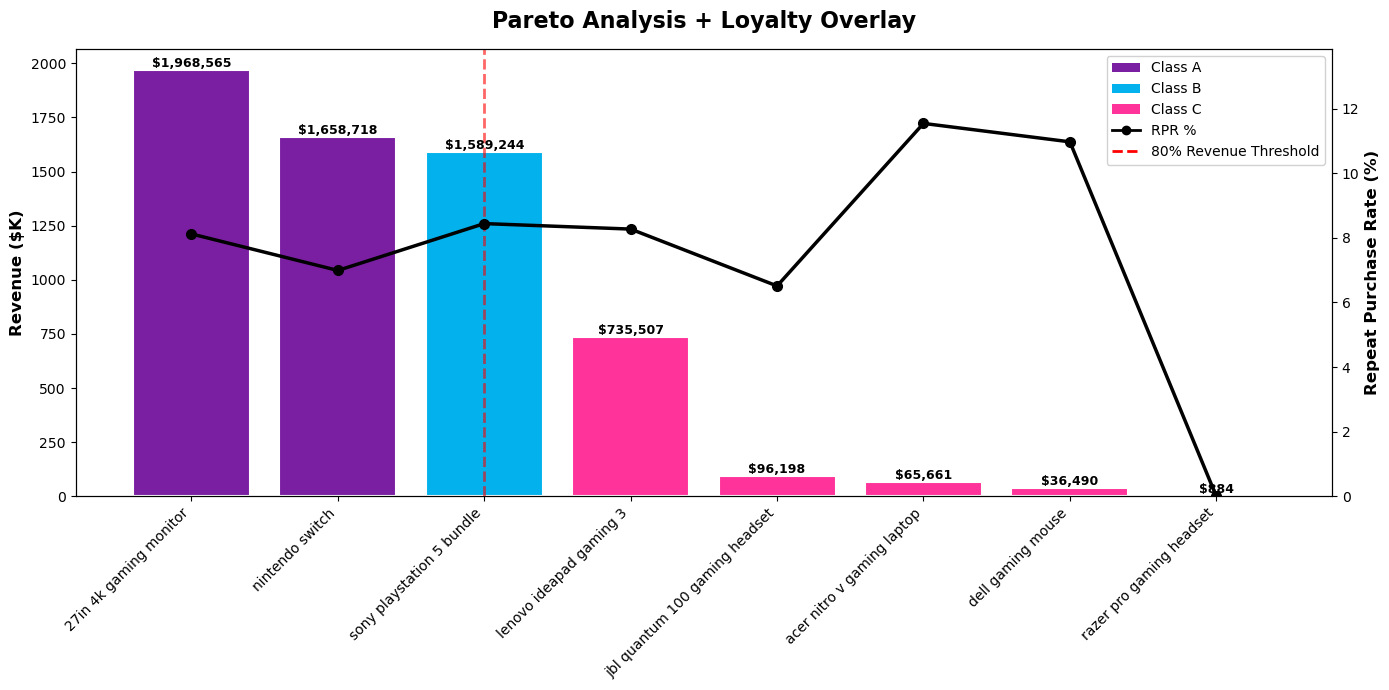

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Sort by total revenue
sorted_df = df.sort_values('total_revenue', ascending=False).reset_index(drop=True)

# Custom colors for ABC classes
abc_colors_palette = ["#7B1FA2", "#03b2ed", "#FF3399"]  # A=purple, B=blue, C=pink
abc_color_map = {'A': abc_colors_palette[0], 'B': abc_colors_palette[1], 'C': abc_colors_palette[2]}
colors = [abc_color_map[c] for c in sorted_df['abc_class']]

# Create figure
fig, ax1 = plt.subplots(figsize=(14, 7))

# --- Bar chart: Total Revenue ---
bars = ax1.bar(
    sorted_df['product_name_cleaned'],
    sorted_df['total_revenue']/1000,  # in $K
    color=colors,
    edgecolor='white',
    linewidth=1.5
)
ax1.set_ylabel('Revenue ($K)', fontsize=12, fontweight='bold')
ax1.set_xticklabels(sorted_df['product_name_cleaned'], rotation=45, ha='right', fontsize=10)

# Add revenue labels on top of bars (thousand separator)
for bar, rev in zip(bars, sorted_df['total_revenue']):
    ax1.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"${rev:,.0f}",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

# --- Line chart: RPR% ---
ax2 = ax1.twinx()
ax2.plot(
    sorted_df['product_name_cleaned'],
    sorted_df['rpr_%'],
    color='black',  # RPR line black
    marker='o',
    linewidth=2.5,
    markersize=7,
    label='RPR %'
)
ax2.set_ylabel('Repeat Purchase Rate (%)', color='black', fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(sorted_df['rpr_%'].max()*1.2, 10))

# --- Add 80% cumulative revenue threshold as vertical line ---
threshold_idx = np.argmax(sorted_df['cumulative_revenue_%'] >= 80)
ax1.axvline(x=threshold_idx, color='red', linestyle='--', linewidth=2, alpha=0.6, label='80% Revenue Threshold')

# --- Legend (Top Right) ---
legend_elements = [
    Patch(facecolor=abc_colors_palette[0], label='Class A'),
    Patch(facecolor=abc_colors_palette[1], label='Class B'),
    Patch(facecolor=abc_colors_palette[2], label='Class C'),
    plt.Line2D([0], [0], color='black', marker='o', linewidth=2, label='RPR %'),
    plt.Line2D([0], [0], color='red', linestyle='--', linewidth=2, label='80% Revenue Threshold')
]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=10, framealpha=0.9)

# --- Title & Layout ---
plt.title('Pareto Analysis + Loyalty Overlay', fontsize=16, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()


C:\Users\shaif\AppData\Local\Temp\ipykernel_18312\1937813913.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_df['product_name_cleaned'], rotation=45, ha='right', fontsize=10)


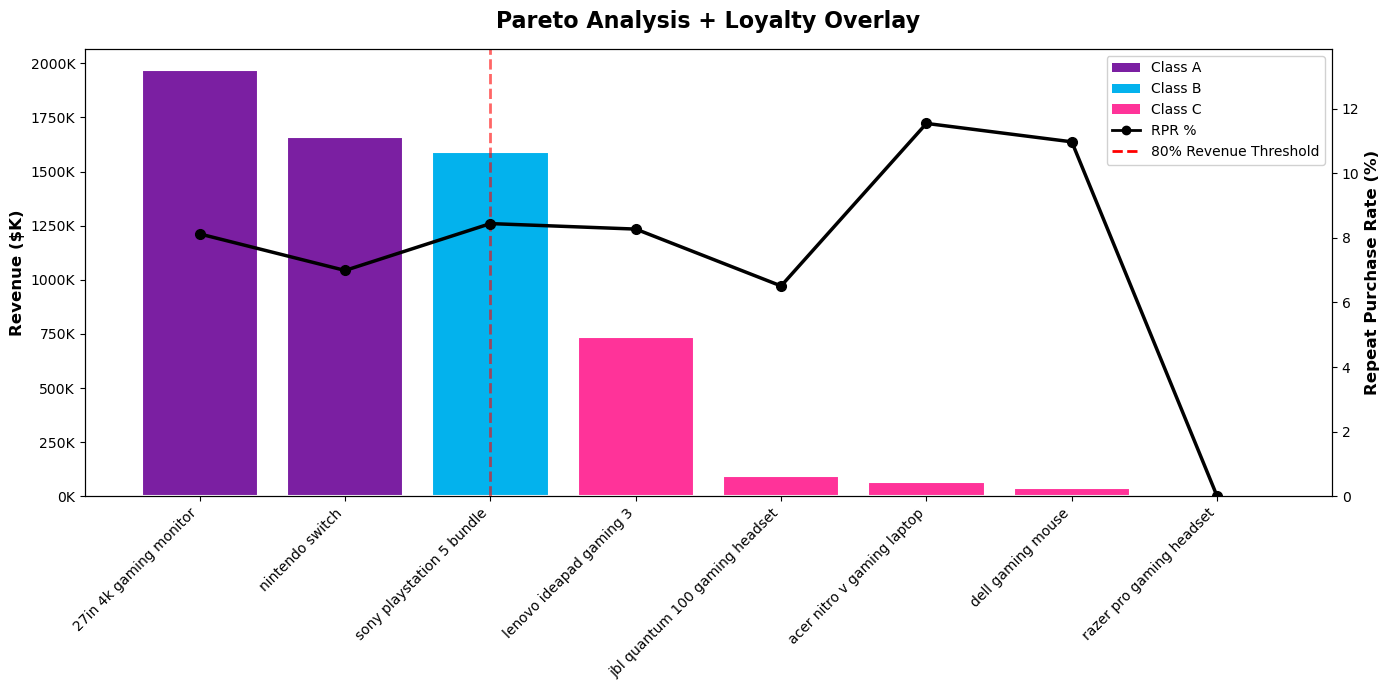

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.ticker import FuncFormatter

# Sort by total revenue
sorted_df = df.sort_values('total_revenue', ascending=False).reset_index(drop=True)

# Custom colors for ABC classes
abc_colors_palette = ["#7B1FA2", "#03b2ed", "#FF3399"]  # A=purple, B=blue, C=pink
abc_color_map = {'A': abc_colors_palette[0], 'B': abc_colors_palette[1], 'C': abc_colors_palette[2]}
colors = [abc_color_map[c] for c in sorted_df['abc_class']]

# Create figure
fig, ax1 = plt.subplots(figsize=(14, 7))

# --- Bar chart: Total Revenue ---
bars = ax1.bar(
    sorted_df['product_name_cleaned'],
    sorted_df['total_revenue']/1000,  # in $K
    color=colors,
    edgecolor='white',
    linewidth=1.5
)
ax1.set_ylabel('Revenue ($K)', fontsize=12, fontweight='bold')
ax1.set_xticklabels(sorted_df['product_name_cleaned'], rotation=45, ha='right', fontsize=10)

# Format y-axis as 1K, 2K etc.
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}K'))

# --- Line chart: RPR% ---
ax2 = ax1.twinx()
ax2.plot(
    sorted_df['product_name_cleaned'],
    sorted_df['rpr_%'],
    color='black',  # RPR line black
    marker='o',
    linewidth=2.5,
    markersize=7,
    label='RPR %'
)
ax2.set_ylabel('Repeat Purchase Rate (%)', color='black', fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(sorted_df['rpr_%'].max()*1.2, 10))

# --- Add 80% cumulative revenue threshold as vertical line ---
threshold_idx = np.argmax(sorted_df['cumulative_revenue_%'] >= 80)
ax1.axvline(x=threshold_idx, color='red', linestyle='--', linewidth=2, alpha=0.6, label='80% Revenue Threshold')

# --- Legend (Top Right) ---
legend_elements = [
    Patch(facecolor=abc_colors_palette[0], label='Class A'),
    Patch(facecolor=abc_colors_palette[1], label='Class B'),
    Patch(facecolor=abc_colors_palette[2], label='Class C'),
    plt.Line2D([0], [0], color='black', marker='o', linewidth=2, label='RPR %'),
    plt.Line2D([0], [0], color='red', linestyle='--', linewidth=2, label='80% Revenue Threshold')
]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=10, framealpha=0.9)

# --- Title & Layout ---
plt.title('Pareto Analysis + Loyalty Overlay', fontsize=16, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

def create_pareto_loyalty_chart(df, 
                                product_col='product_name_cleaned',
                                revenue_col='total_revenue',
                                revenue_share_col='revenue_%_of_total',
                                cumulative_col='cumulative_revenue_%',
                                loyalty_col='rpr_%',
                                abc_col='abc_class',
                                threshold=80,
                                figsize=(16, 8)):
    """
    Creates a Pareto + Loyalty Overlay chart with dark theme styling.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe with product data
    product_col : str
        Column name for product names
    revenue_col : str
        Column name for total revenue values
    revenue_share_col : str
        Column name for revenue share percentage
    cumulative_col : str
        Column name for cumulative revenue percentage
    loyalty_col : str
        Column name for repeat purchase rate
    abc_col : str
        Column name for ABC classification
    threshold : int
        Revenue threshold percentage for the horizontal line (default: 80)
    figsize : tuple
        Figure size (width, height)
    """
    
    # Sort by total revenue descending
    sorted_df = df.sort_values(revenue_col, ascending=False).reset_index(drop=True)
    
    # Color mapping
    abc_colors_palette = ["#7B1FA2", "#03b2ed", "#FF3399"]
    abc_color_map = {'A': abc_colors_palette[0], 'B': abc_colors_palette[1], 'C': abc_colors_palette[2]}
    colors = [abc_color_map[c] for c in sorted_df[abc_col]]
    
    # Create figure with dark theme
    plt.style.use('dark_background')
    fig, ax1 = plt.subplots(figsize=figsize, facecolor='#0f172a')
    ax1.set_facecolor('#1e293b')
    
    # Bar chart: Revenue Share
    bars = ax1.bar(
        sorted_df[product_col],
        sorted_df[revenue_share_col],
        color=colors,
        edgecolor='#475569',
        linewidth=2,
        alpha=0.9
    )
    
    ax1.set_ylabel('Revenue Share (%)', fontsize=14, fontweight='bold', color='#f1f5f9')
    ax1.set_xlabel('Products', fontsize=14, fontweight='bold', color='#f1f5f9')
    ax1.tick_params(axis='y', labelcolor='#f1f5f9', labelsize=11)
    ax1.tick_params(axis='x', labelcolor='#94a3b8', labelsize=10)
    ax1.set_xticklabels(sorted_df[product_col], rotation=45, ha='right')
    ax1.spines['bottom'].set_color('#475569')
    ax1.spines['left'].set_color('#475569')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.grid(axis='y', alpha=0.2, color='#475569', linestyle='--')
    
    # Cumulative line (Pareto)
    ax2 = ax1.twinx()
    line_cumulative = ax2.plot(
        sorted_df[product_col],
        sorted_df[cumulative_col],
        color='#FFD700',
        marker='D',
        linewidth=3,
        markersize=8,
        label='Cumulative Revenue %',
        zorder=5
    )
    ax2.set_ylabel('Cumulative Revenue (%)', color='#FFD700', fontsize=14, fontweight='bold')
    ax2.tick_params(axis='y', labelcolor='#FFD700', labelsize=11)
    ax2.set_ylim(0, 105)
    ax2.spines['right'].set_color('#475569')
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    
    # Threshold line
    ax2.axhline(y=threshold, color='#FF3399', linestyle='--', linewidth=2.5, alpha=0.8, 
                label=f'{threshold}% Threshold', zorder=4)
    
    # Loyalty overlay (Repeat Purchase Rate)
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))
    line_loyalty = ax3.plot(
        sorted_df[product_col],
        sorted_df[loyalty_col],
        color='#03b2ed',
        marker='o',
        linewidth=2.5,
        markersize=9,
        label='Repeat Purchase Rate %',
        linestyle='-.',
        zorder=6
    )
    ax3.set_ylabel('Repeat Purchase Rate (%)', color='#03b2ed', fontsize=14, fontweight='bold')
    ax3.tick_params(axis='y', labelcolor='#03b2ed', labelsize=11)
    ax3.set_ylim(0, max(sorted_df[loyalty_col].max() * 1.3, 12))
    ax3.spines['right'].set_color('#475569')
    ax3.spines['top'].set_visible(False)
    ax3.spines['left'].set_visible(False)
    
    # Add value labels on bars
    for i, (bar, value) in enumerate(zip(bars, sorted_df[revenue_share_col])):
        height = bar.get_height()
        ax1.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.5,
            f'{value:.1f}%',
            ha='center',
            va='bottom',
            fontsize=9,
            color='#f1f5f9',
            fontweight='bold'
        )
    
    # Legend
    legend_elements = [
        Patch(facecolor=abc_colors_palette[0], edgecolor='#475569', label='Class A (Top 80%)'),
        Patch(facecolor=abc_colors_palette[1], edgecolor='#475569', label='Class B (80-95%)'),
        Patch(facecolor=abc_colors_palette[2], edgecolor='#475569', label='Class C (95-100%)'),
        plt.Line2D([0], [0], color='#FFD700', marker='D', linewidth=3, markersize=8, 
                   label='Cumulative Revenue %'),
        plt.Line2D([0], [0], color='#03b2ed', marker='o', linewidth=2.5, markersize=8, 
                   linestyle='-.', label='Repeat Purchase Rate %'),
        plt.Line2D([0], [0], color='#FF3399', linestyle='--', linewidth=2.5, 
                   label=f'{threshold}% Revenue Threshold')
    ]
    ax1.legend(
        handles=legend_elements,
        loc='upper left',
        fontsize=11,
        framealpha=0.95,
        facecolor='#1e293b',
        edgecolor='#475569',
        labelcolor='#f1f5f9'
    )
    
    # Title
    plt.title(
        'Pareto Analysis + Loyalty Overlay\nRevenue Concentration & Repeat Purchase Patterns',
        fontsize=18,
        fontweight='bold',
        pad=20,
        color='#ffffff'
    )
    
    plt.tight_layout()
    plt.show()
    
   


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.ticker import FuncFormatter

# ---------------- THEME COLORS ----------------
FIG_BG   = "#0f172a"   # page background
AX_BG    = "#1e293b"   # plot background
TEXT_L   = "#f1f5f9"   # light slate text
TEXT_M   = "#94a3b8"   # subtle x labels
SPINE_B  = "#475569"   # faint axis line

# Gradient palette for ABC
abc_colors_palette = ["#7B1FA2", "#03b2ed", "#FF3399"]
abc_color_map = {"A": abc_colors_palette[0], "B": abc_colors_palette[1], "C": abc_colors_palette[2]}

# Sort data
sorted_df = df.sort_values('total_revenue', ascending=False).reset_index(drop=True)
colors = [abc_color_map[c] for c in sorted_df['abc_class']]

# ---------------- FIGURE ----------------
fig, ax1 = plt.subplots(figsize=(14, 7))
fig.patch.set_facecolor(FIG_BG)
ax1.set_facecolor(AX_BG)

# ---------------- BAR CHART (Revenue) ----------------
bars = ax1.bar(
    sorted_df['product_name_cleaned'],
    sorted_df['total_revenue'] / 1000,
    color=colors,
    edgecolor=AX_BG,       # blends into background
    linewidth=1.2
)

# Y-axis label
ax1.set_ylabel(
    "Revenue ($K)",
    fontsize=12,
    fontweight="bold",
    color=TEXT_L
)

# X-axis labels
ax1.set_xticks(np.arange(len(sorted_df)))
ax1.set_xticklabels(
    sorted_df['product_name_cleaned'],
    rotation=45,
    ha='right',
    fontsize=10,
    color=TEXT_M
)

# Format axis tick labels
ax1.tick_params(axis='y', labelcolor=TEXT_L)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}K'))

# Subtle bottom spine
ax1.spines['bottom'].set_color(SPINE_B)
ax1.spines['left'].set_color(SPINE_B)
ax1.spines['top'].set_color(AX_BG)
ax1.spines['right'].set_color(AX_BG)

# ---------------- LINE CHART (RPR %) ----------------
ax2 = ax1.twinx()
ax2.set_facecolor("none")

ax2.plot(
    sorted_df['product_name_cleaned'],
    sorted_df['rpr_%'],
    color=TEXT_L,          # soft white line
    marker='o',
    markersize=7,
    linewidth=2.5,
    label="RPR %"
)

ax2.set_ylabel(
    "Repeat Purchase Rate (%)",
    fontsize=12,
    fontweight="bold",
    color=TEXT_L
)
ax2.tick_params(axis='y', labelcolor=TEXT_L)
ax2.spines['right'].set_color(SPINE_B)

# ---------------- 80% CUTOFF LINE ----------------
threshold_idx = np.argmax(sorted_df['cumulative_revenue_%'] >= 80)
ax1.axvline(
    x=threshold_idx,
    color="#FF3399",
    linestyle='--',
    linewidth=2,
    alpha=0.7,
    label="80% Revenue Threshold"
)

# ---------------- LEGEND ----------------
legend_elements = [
    Patch(facecolor=abc_colors_palette[0], label='Class A'),
    Patch(facecolor=abc_colors_palette[1], label='Class B'),
    Patch(facecolor=abc_colors_palette[2], label='Class C'),
    plt.Line2D([0], [0], color=TEXT_L, marker='o', linewidth=2, label='RPR %'),
    plt.Line2D([0], [0], color="#FF3399", linestyle='--', linewidth=2, label='80% Revenue Threshold')
]

ax1.legend(
    handles=legend_elements,
    loc='upper right',
    fontsize=10,
    framealpha=0.15,
    facecolor=AX_BG,
    edgecolor=SPINE_B,
    labelcolor=TEXT_L
)

# ---------------- TITLE ----------------
plt.title(
    "Pareto Analysis + Loyalty Overlay",
    fontsize=16,
    fontweight="bold",
    color="white",
    pad=15
)

plt.tight_layout()
plt.show()


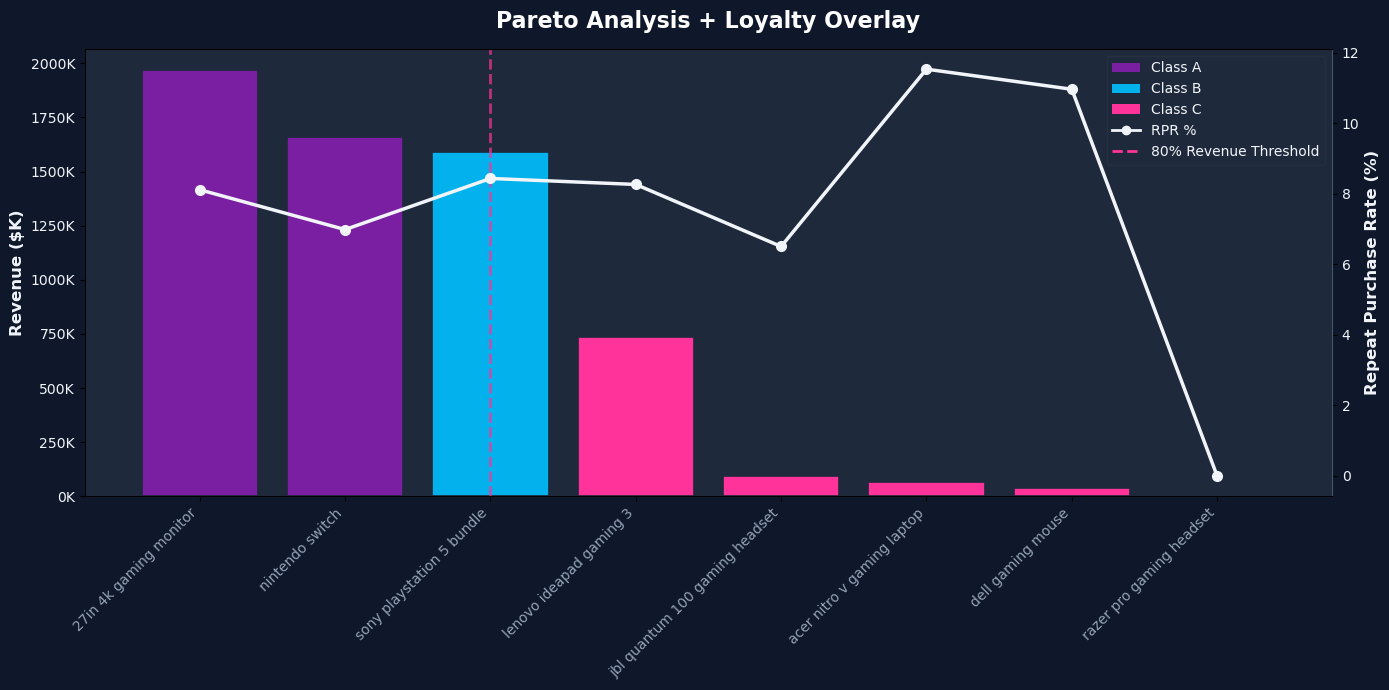

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.ticker import FuncFormatter

# ---------------- THEME COLORS ----------------
FIG_BG   = "#0f172a"   # page background
AX_BG    = "#1e293b"   # plot background
TEXT_L   = "#f1f5f9"   # light slate text
TEXT_M   = "#94a3b8"   # subtle x labels
SPINE_B  = "#475569"   # faint axis line

# Gradient palette for ABC
abc_colors_palette = ["#7B1FA2", "#03b2ed", "#FF3399"]
abc_color_map = {"A": abc_colors_palette[0], "B": abc_colors_palette[1], "C": abc_colors_palette[2]}

# Sort data
sorted_df = df.sort_values('total_revenue', ascending=False).reset_index(drop=True)
colors = [abc_color_map[c] for c in sorted_df['abc_class']]

# ---------------- FIGURE ----------------
fig, ax1 = plt.subplots(figsize=(14, 7))
fig.patch.set_facecolor(FIG_BG)
ax1.set_facecolor(AX_BG)

# ---------------- BAR CHART (Revenue) ----------------
bars = ax1.bar(
    sorted_df['product_name_cleaned'],
    sorted_df['total_revenue'] / 1000,
    color=colors,
    edgecolor=AX_BG,       # blends into background
    linewidth=1.2
)

# Y-axis label
ax1.set_ylabel(
    "Revenue ($K)",
    fontsize=12,
    fontweight="bold",
    color=TEXT_L
)

# X-axis labels
ax1.set_xticks(np.arange(len(sorted_df)))
ax1.set_xticklabels(
    sorted_df['product_name_cleaned'],
    rotation=45,
    ha='right',
    fontsize=10,
    color=TEXT_M
)

# Format axis tick labels
ax1.tick_params(axis='y', labelcolor=TEXT_L)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}K'))

# Subtle bottom spine
ax1.spines['bottom'].set_color(SPINE_B)
ax1.spines['left'].set_color(SPINE_B)
ax1.spines['top'].set_color(AX_BG)
ax1.spines['right'].set_color(AX_BG)

# ---------------- LINE CHART (RPR %) ----------------
ax2 = ax1.twinx()
ax2.set_facecolor("none")

ax2.plot(
    sorted_df['product_name_cleaned'],
    sorted_df['rpr_%'],
    color=TEXT_L,          # soft white line
    marker='o',
    markersize=7,
    linewidth=2.5,
    label="RPR %"
)

ax2.set_ylabel(
    "Repeat Purchase Rate (%)",
    fontsize=12,
    fontweight="bold",
    color=TEXT_L
)
ax2.tick_params(axis='y', labelcolor=TEXT_L)
ax2.spines['right'].set_color(SPINE_B)

# ---------------- 80% CUTOFF LINE ----------------
threshold_idx = np.argmax(sorted_df['cumulative_revenue_%'] >= 80)
ax1.axvline(
    x=threshold_idx,
    color="#FF3399",
    linestyle='--',
    linewidth=2,
    alpha=0.7,
    label="80% Revenue Threshold"
)

# ---------------- LEGEND ----------------
legend_elements = [
    Patch(facecolor=abc_colors_palette[0], label='Class A'),
    Patch(facecolor=abc_colors_palette[1], label='Class B'),
    Patch(facecolor=abc_colors_palette[2], label='Class C'),
    plt.Line2D([0], [0], color=TEXT_L, marker='o', linewidth=2, label='RPR %'),
    plt.Line2D([0], [0], color="#FF3399", linestyle='--', linewidth=2, label='80% Revenue Threshold')
]

ax1.legend(
    handles=legend_elements,
    loc='upper right',
    fontsize=10,
    framealpha=0.15,
    facecolor=AX_BG,
    edgecolor=SPINE_B,
    labelcolor=TEXT_L
)

# ---------------- TITLE ----------------
plt.title(
    "Pareto Analysis + Loyalty Overlay",
    fontsize=16,
    fontweight="bold",
    color="white",
    pad=15
)

plt.tight_layout()
plt.show()


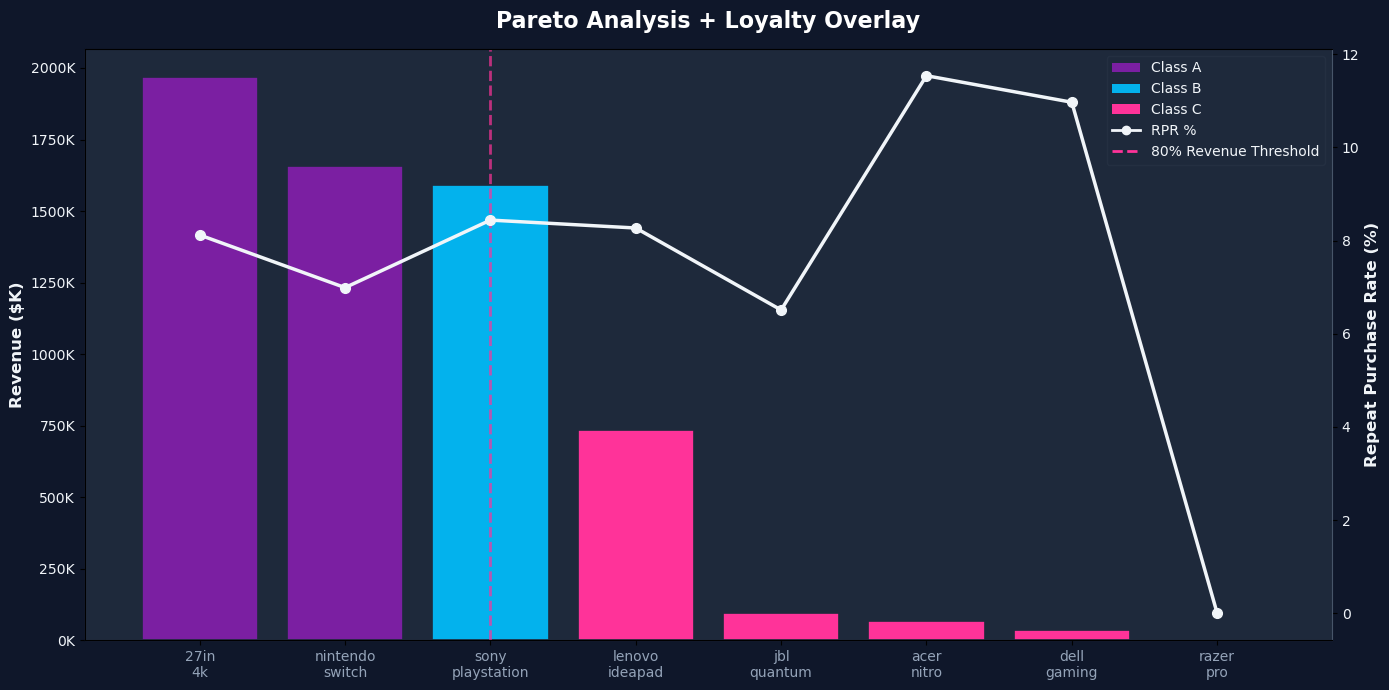

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.ticker import FuncFormatter

# ---------------- THEME COLORS ----------------
FIG_BG   = "#0f172a"   # page background
AX_BG    = "#1e293b"   # plot background
TEXT_L   = "#f1f5f9"   # light slate text
TEXT_M   = "#94a3b8"   # subtle x labels
SPINE_B  = "#475569"   # faint axis line

# Gradient palette for ABC
abc_colors_palette = ["#7B1FA2", "#03b2ed", "#FF3399"]
abc_color_map = {"A": abc_colors_palette[0], "B": abc_colors_palette[1], "C": abc_colors_palette[2]}

# ---------------- DATA PREP ----------------
sorted_df = df.sort_values('total_revenue', ascending=False).reset_index(drop=True)

# Create clean wrapped + truncated labels
def wrap_and_truncate(name, word_limit=2, char_limit=16):
    words = name.split()
    short = " ".join(words[:word_limit])
    if len(short) > char_limit:
        short = short[:char_limit] + "…"
    return short.replace(" ", "\n")

sorted_df["label"] = sorted_df["product_name_cleaned"].apply(wrap_and_truncate)

colors = [abc_color_map[c] for c in sorted_df['abc_class']]

# ---------------- FIGURE ----------------
fig, ax1 = plt.subplots(figsize=(14, 7))
fig.patch.set_facecolor(FIG_BG)
ax1.set_facecolor(AX_BG)

# ---------------- BAR CHART (Revenue) ----------------
bars = ax1.bar(
    sorted_df['label'],
    sorted_df['total_revenue'] / 1000,
    color=colors,
    edgecolor=AX_BG,
    linewidth=1.2
)

# Y-axis label
ax1.set_ylabel("Revenue ($K)", fontsize=12, fontweight="bold", color=TEXT_L)

# X-axis labels
ax1.set_xticks(np.arange(len(sorted_df)))
ax1.set_xticklabels(
    sorted_df['label'],
    rotation=0,
    ha='center',
    fontsize=10,
    color=TEXT_M
)

# Y-axis formatting
ax1.tick_params(axis='y', labelcolor=TEXT_L)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}K'))

# Subtle spines
ax1.spines['bottom'].set_color(SPINE_B)
ax1.spines['left'].set_color(SPINE_B)
ax1.spines['top'].set_color(AX_BG)
ax1.spines['right'].set_color(AX_BG)

# ---------------- LINE CHART (RPR %) ----------------
ax2 = ax1.twinx()
ax2.set_facecolor("none")

ax2.plot(
    sorted_df['label'],
    sorted_df['rpr_%'],
    color=TEXT_L,
    marker='o',
    markersize=7,
    linewidth=2.5,
    label="RPR %"
)

ax2.set_ylabel("Repeat Purchase Rate (%)", fontsize=12, fontweight="bold", color=TEXT_L)
ax2.tick_params(axis='y', labelcolor=TEXT_L)
ax2.spines['right'].set_color(SPINE_B)

# ---------------- 80% CUT-OFF ----------------
threshold_idx = np.argmax(sorted_df['cumulative_revenue_%'] >= 80)
ax1.axvline(
    x=threshold_idx,
    color="#FF3399",
    linestyle="--",
    linewidth=2,
    alpha=0.7,
    label="80% Revenue Threshold"
)

# ---------------- LEGEND ----------------
legend_elements = [
    Patch(facecolor=abc_colors_palette[0], label='Class A'),
    Patch(facecolor=abc_colors_palette[1], label='Class B'),
    Patch(facecolor=abc_colors_palette[2], label='Class C'),
    plt.Line2D([0], [0], color=TEXT_L, marker='o', linewidth=2, label='RPR %'),
    plt.Line2D([0], [0], color="#FF3399", linestyle='--', linewidth=2, label='80% Revenue Threshold')
]

ax1.legend(
    handles=legend_elements,
    loc='upper right',
    fontsize=10,
    framealpha=0.15,
    facecolor=AX_BG,
    edgecolor=SPINE_B,
    labelcolor=TEXT_L
)

# ---------------- TITLE ----------------
plt.title(
    "Pareto Analysis + Loyalty Overlay",
    fontsize=16,
    fontweight="bold",
    color="white",
    pad=15
)

plt.tight_layout()
plt.show()


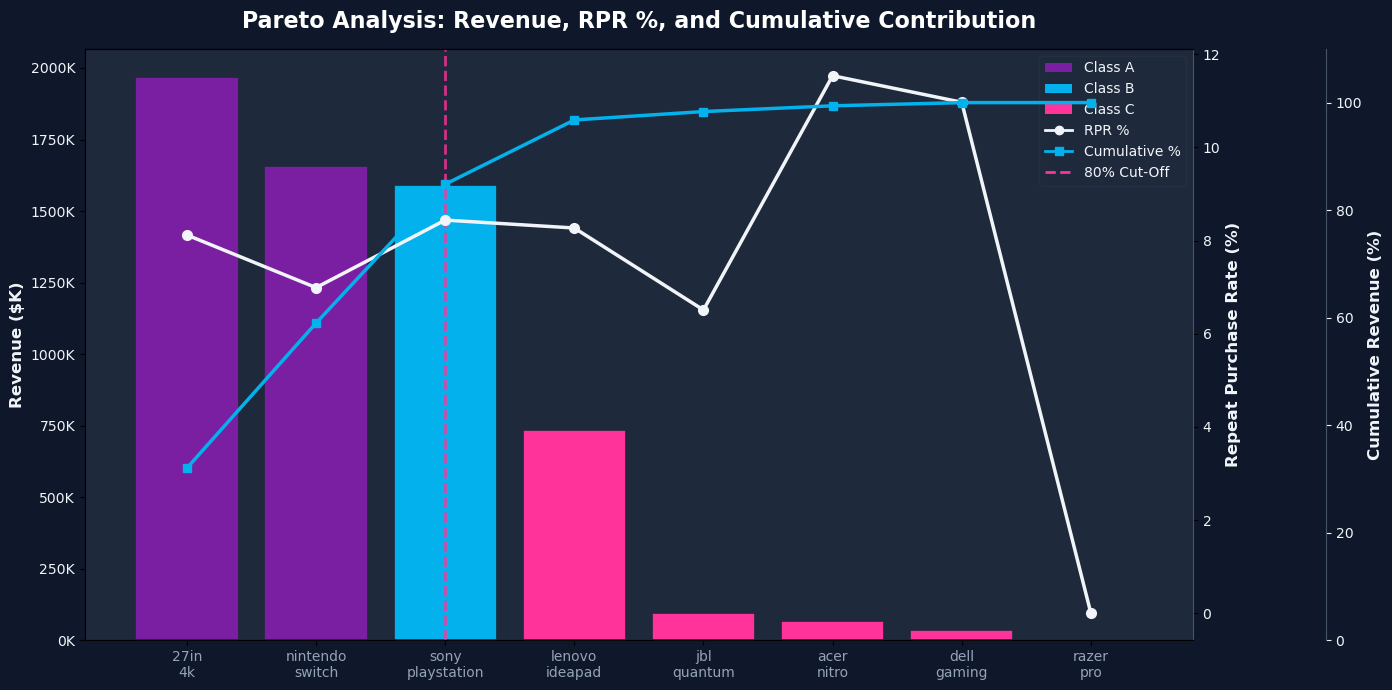

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.ticker import FuncFormatter

# ---------------- THEME COLORS ----------------
FIG_BG   = "#0f172a"   # page background
AX_BG    = "#1e293b"   # plot background
TEXT_L   = "#f1f5f9"   # light slate text
TEXT_M   = "#94a3b8"   # subtle x labels
SPINE_B  = "#475569"   # faint axis line

# Gradient palette for ABC
abc_colors_palette = ["#7B1FA2", "#03b2ed", "#FF3399"]
abc_color_map = {"A": abc_colors_palette[0], "B": abc_colors_palette[1], "C": abc_colors_palette[2]}

# ---------------- DATA PREP ----------------
sorted_df = df.sort_values('total_revenue', ascending=False).reset_index(drop=True)

# Clean label formatter
def wrap_and_truncate(name, word_limit=2, char_limit=16):
    words = name.split()
    short = " ".join(words[:word_limit])
    if len(short) > char_limit:
        short = short[:char_limit] + "…"
    return short.replace(" ", "\n")

sorted_df["label"] = sorted_df["product_name_cleaned"].apply(wrap_and_truncate)
colors = [abc_color_map[c] for c in sorted_df['abc_class']]

# ---------------- FIGURE ----------------
fig, ax1 = plt.subplots(figsize=(14, 7))
fig.patch.set_facecolor(FIG_BG)
ax1.set_facecolor(AX_BG)

# ---------------- BAR CHART (Revenue) ----------------
bars = ax1.bar(
    sorted_df['label'],
    sorted_df['total_revenue'] / 1000,
    color=colors,
    edgecolor=AX_BG,
    linewidth=1.2
)

ax1.set_ylabel("Revenue ($K)", fontsize=12, fontweight="bold", color=TEXT_L)
ax1.set_xticks(np.arange(len(sorted_df)))
ax1.set_xticklabels(sorted_df['label'], rotation=0, ha='center', fontsize=10, color=TEXT_M)
ax1.tick_params(axis='y', labelcolor=TEXT_L)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}K'))

# Subtle spines
ax1.spines['bottom'].set_color(SPINE_B)
ax1.spines['left'].set_color(SPINE_B)
ax1.spines['top'].set_color(AX_BG)
ax1.spines['right'].set_color(AX_BG)

# ---------------- LINE CHART (RPR %) ----------------
ax2 = ax1.twinx()
ax2.set_facecolor("none")

ax2.plot(
    sorted_df['label'],
    sorted_df['rpr_%'],
    color=TEXT_L,
    marker='o',
    markersize=7,
    linewidth=2.5,
    label="RPR %"
)

ax2.set_ylabel("Repeat Purchase Rate (%)", fontsize=12, fontweight="bold", color=TEXT_L)
ax2.tick_params(axis='y', labelcolor=TEXT_L)
ax2.spines['right'].set_color(SPINE_B)

# ---------------- CUMULATIVE % LINE ----------------
ax3 = ax1.twinx()      # second twin axis
ax3.set_facecolor("none")
ax3.spines['right'].set_position(("axes", 1.12))  # offset outward
ax3.spines['right'].set_color(SPINE_B)
ax3.tick_params(axis='y', colors=TEXT_L)

ax3.plot(
    sorted_df['label'],
    sorted_df['cumulative_revenue_%'],
    color="#03b2ed",          # cyan highlight to match theme
    marker='s',
    markersize=6,
    linewidth=2.5,
    linestyle='-',
    label="Cumulative Revenue %"
)

ax3.set_ylabel("Cumulative Revenue (%)", fontsize=12, fontweight="bold", color=TEXT_L)
ax3.set_ylim(0, 110)

# ---------------- 80% CUT-OFF ----------------
threshold_idx = np.argmax(sorted_df['cumulative_revenue_%'] >= 80)

ax1.axvline(
    x=threshold_idx,
    color="#FF3399",
    linestyle="--",
    linewidth=2,
    alpha=0.8,
    label="80% Revenue Threshold"
)

# ---------------- LEGEND ----------------
legend_elements = [
    Patch(facecolor=abc_colors_palette[0], label='Class A'),
    Patch(facecolor=abc_colors_palette[1], label='Class B'),
    Patch(facecolor=abc_colors_palette[2], label='Class C'),
    plt.Line2D([0], [0], color=TEXT_L, marker='o', linewidth=2, label='RPR %'),
    plt.Line2D([0], [0], color="#03b2ed", marker='s', linewidth=2, label='Cumulative %'),
    plt.Line2D([0], [0], color="#FF3399", linestyle='--', linewidth=2, label='80% Cut-Off')
]

ax1.legend(
    handles=legend_elements,
    loc='upper right',
    fontsize=10,
    framealpha=0.15,
    facecolor=AX_BG,
    edgecolor=SPINE_B,
    labelcolor=TEXT_L
)

# ---------------- TITLE ----------------
plt.title(
    "Pareto Analysis: Revenue, RPR %, and Cumulative Contribution",
    fontsize=16,
    fontweight="bold",
    color="white",
    pad=15
)

plt.tight_layout()
plt.show()


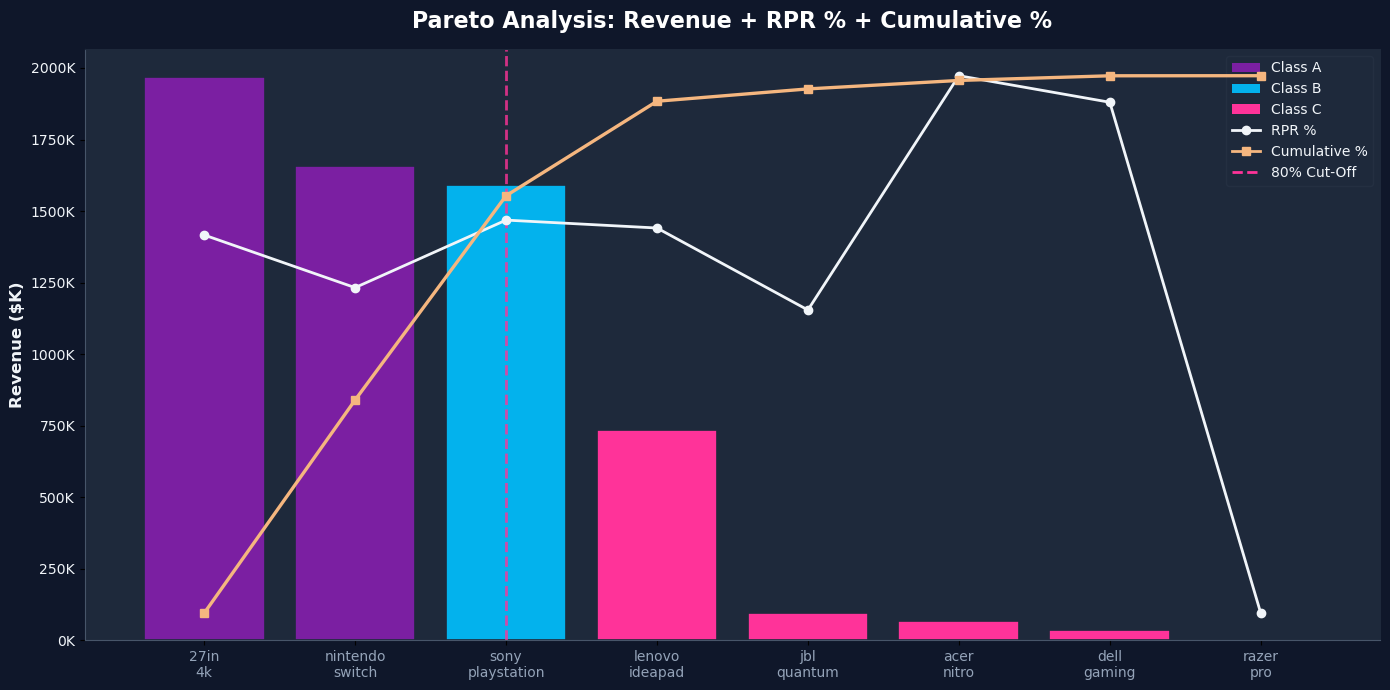

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.ticker import FuncFormatter

# ---------------- THEME COLORS ----------------
FIG_BG   = "#0f172a"   # page background
AX_BG    = "#1e293b"   # plot background
TEXT_L   = "#f1f5f9"   # light slate text
TEXT_M   = "#94a3b8"   # subtle x labels
SPINE_B  = "#475569"   # faint axis line

# New distinct light color for cumulative %
CUMM_COLOR = "#f5b67f"   # light aqua / cyan glow

# Gradient palette for ABC
abc_colors_palette = ["#7B1FA2", "#03b2ed", "#FF3399"]
abc_color_map = {"A": abc_colors_palette[0], "B": abc_colors_palette[1], "C": abc_colors_palette[2]}

# ---------------- DATA PREP ----------------
sorted_df = df.sort_values('total_revenue', ascending=False).reset_index(drop=True)

def wrap_and_truncate(name, word_limit=2, char_limit=16):
    words = name.split()
    short = " ".join(words[:word_limit])
    if len(short) > char_limit:
        short = short[:char_limit] + "…"
    return short.replace(" ", "\n")

sorted_df["label"] = sorted_df["product_name_cleaned"].apply(wrap_and_truncate)
colors = [abc_color_map[c] for c in sorted_df['abc_class']]

# ---------------- FIGURE ----------------
fig, ax1 = plt.subplots(figsize=(14, 7))
fig.patch.set_facecolor(FIG_BG)
ax1.set_facecolor(AX_BG)

# ---------------- BAR CHART ----------------
bars = ax1.bar(
    sorted_df['label'],
    sorted_df['total_revenue'] / 1000,
    color=colors,
    edgecolor=AX_BG,
    linewidth=1.2
)

ax1.set_ylabel("Revenue ($K)", fontsize=12, fontweight="bold", color=TEXT_L)

ax1.set_xticks(np.arange(len(sorted_df)))
ax1.set_xticklabels(sorted_df['label'], rotation=0, ha='center', fontsize=10, color=TEXT_M)

ax1.tick_params(axis='y', labelcolor=TEXT_L)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}K'))

# subtle spines
ax1.spines['bottom'].set_color(SPINE_B)
ax1.spines['left'].set_color(SPINE_B)
ax1.spines['top'].set_color(AX_BG)
ax1.spines['right'].set_color(AX_BG)


# ---------------- RPR % LINE (no axis) ----------------
ax2 = ax1.twinx()
ax2.set_facecolor("none")
ax2.plot(
    sorted_df['label'],
    sorted_df['rpr_%'],
    color=TEXT_L,
    marker='o',
    markersize=6,
    linewidth=2,
    label="RPR %"
)

# remove RPR axis entirely
ax2.set_yticks([])
ax2.set_ylabel("")
for spine in ax2.spines.values():
    spine.set_visible(False)


# ---------------- CUMULATIVE % LINE (new light color, no axis) ----------------
ax3 = ax1.twinx()
ax3.set_facecolor("none")
ax3.spines['right'].set_position(("axes", 1.06))

ax3.plot(
    sorted_df['label'],
    sorted_df['cumulative_revenue_%'],
    color=CUMM_COLOR,
    marker='s',
    markersize=6,
    linewidth=2.4,
    linestyle='-',
    label="Cumulative Revenue %"
)

# remove cumulative axis
ax3.set_yticks([])
ax3.set_ylabel("")
for spine in ax3.spines.values():
    spine.set_visible(False)


# ---------------- 80% THRESHOLD ----------------
threshold_idx = np.argmax(sorted_df['cumulative_revenue_%'] >= 80)

ax1.axvline(
    x=threshold_idx,
    color="#FF3399",
    linestyle="--",
    linewidth=2,
    alpha=0.8
)


# ---------------- LEGEND ----------------
legend_elements = [
    Patch(facecolor=abc_colors_palette[0], label='Class A'),
    Patch(facecolor=abc_colors_palette[1], label='Class B'),
    Patch(facecolor=abc_colors_palette[2], label='Class C'),
    plt.Line2D([0], [0], color=TEXT_L, marker='o', linewidth=2, label='RPR %'),
    plt.Line2D([0], [0], color=CUMM_COLOR, marker='s', linewidth=2, label='Cumulative %'),
    plt.Line2D([0], [0], color="#FF3399", linestyle='--', linewidth=2, label='80% Cut-Off')
]

ax1.legend(
    handles=legend_elements,
    loc='upper right',
    fontsize=10,
    framealpha=0.15,
    facecolor=AX_BG,
    edgecolor=SPINE_B,
    labelcolor=TEXT_L
)


plt.title(
    "Pareto Analysis: Revenue + RPR % + Cumulative %",
    fontsize=16,
    fontweight="bold",
    color="white",
    pad=15
)

plt.tight_layout()
plt.show()


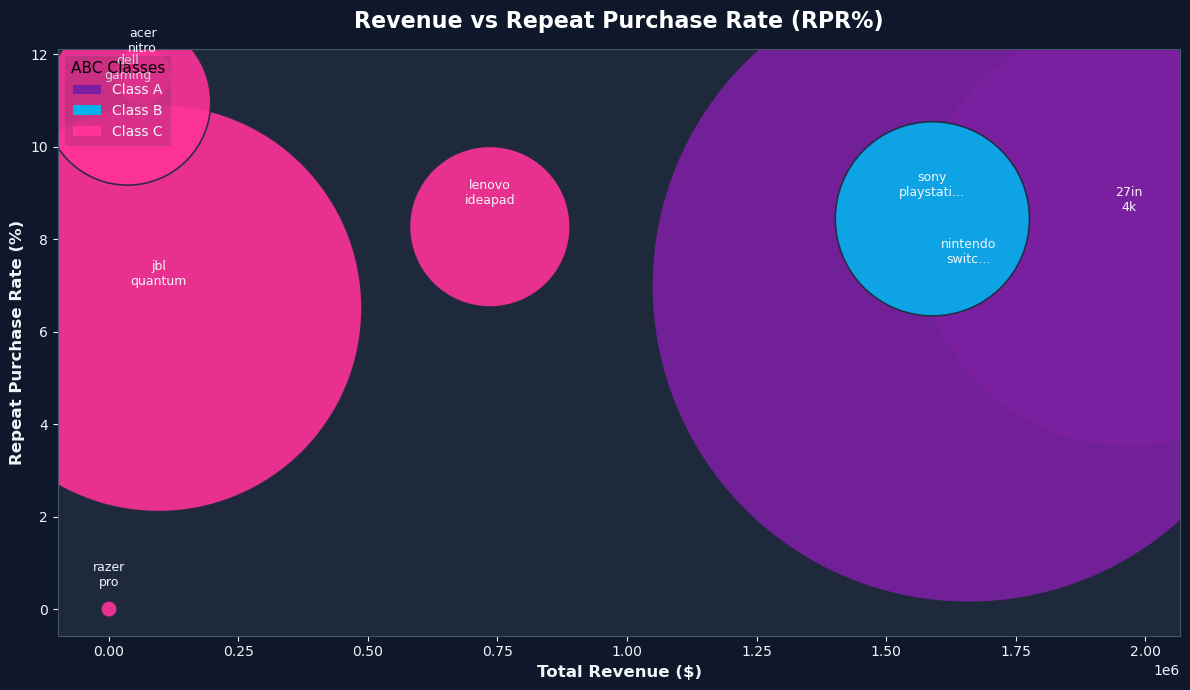

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# ---------------- THEME COLORS ----------------
FIG_BG   = "#0f172a"   # page background
AX_BG    = "#1e293b"   # plot background
TEXT_L   = "#f1f5f9"   # light slate text
TEXT_M   = "#94a3b8"   # subtle text
SPINE_B  = "#475569"   # axis line

# ABC palette (same as Pareto)
abc_colors_palette = ["#7B1FA2", "#03b2ed", "#FF3399"]
abc_color_map = {"A": abc_colors_palette[0], "B": abc_colors_palette[1], "C": abc_colors_palette[2]}

# ---------------- DATA PREP ----------------
df["color"] = df["abc_class"].map(abc_color_map)

# Label wrap function
def wrap_label(name, word_limit=2, char_limit=14):
    words = name.split()
    short = " ".join(words[:word_limit])
    if len(short) > char_limit:
        short = short[:char_limit] + "…"
    return short.replace(" ", "\n")

df["label"] = df["product_name_cleaned"].apply(wrap_label)

# Bubble size (scaled orders)
sizes = df["total_orders"] * 20  # adjust multiplier if needed

# ---------------- FIGURE ----------------
fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor(FIG_BG)
ax.set_facecolor(AX_BG)

# ---------------- SCATTER PLOT ----------------
scatter = ax.scatter(
    df["total_revenue"],
    df["rpr_%"],
    s=sizes,
    c=df["color"],
    alpha=0.9,
    edgecolor=AX_BG,
    linewidth=1.2
)

# Add labels next to bubbles
for _, row in df.iterrows():
    ax.text(
        row["total_revenue"],
        row["rpr_%"] + 0.5,  # slight upward offset
        row["label"],
        fontsize=9,
        ha='center',
        color=TEXT_L
    )

# ---------------- AXIS STYLE ----------------
ax.set_xlabel("Total Revenue ($)", fontsize=12, fontweight="bold", color=TEXT_L)
ax.set_ylabel("Repeat Purchase Rate (%)", fontsize=12, fontweight="bold", color=TEXT_L)

ax.tick_params(axis='both', colors=TEXT_L)

# Spines
for spine in ax.spines.values():
    spine.set_color(SPINE_B)

# ---------------- LEGEND ----------------
legend_elements = [
    Patch(facecolor=abc_colors_palette[0], label='Class A'),
    Patch(facecolor=abc_colors_palette[1], label='Class B'),
    Patch(facecolor=abc_colors_palette[2], label='Class C'),
]

ax.legend(
    handles=legend_elements,
    title="ABC Classes",
    loc="upper left",
    fontsize=10,
    framealpha=0.15,
    facecolor=AX_BG,
    edgecolor=SPINE_B,
    title_fontsize=11,
    labelcolor=TEXT_L
)

# ---------------- TITLE ----------------
plt.title(
    "Revenue vs Repeat Purchase Rate (RPR%)",
    fontsize=16,
    fontweight="bold",
    color="white",
    pad=15
)

plt.tight_layout()
plt.show()


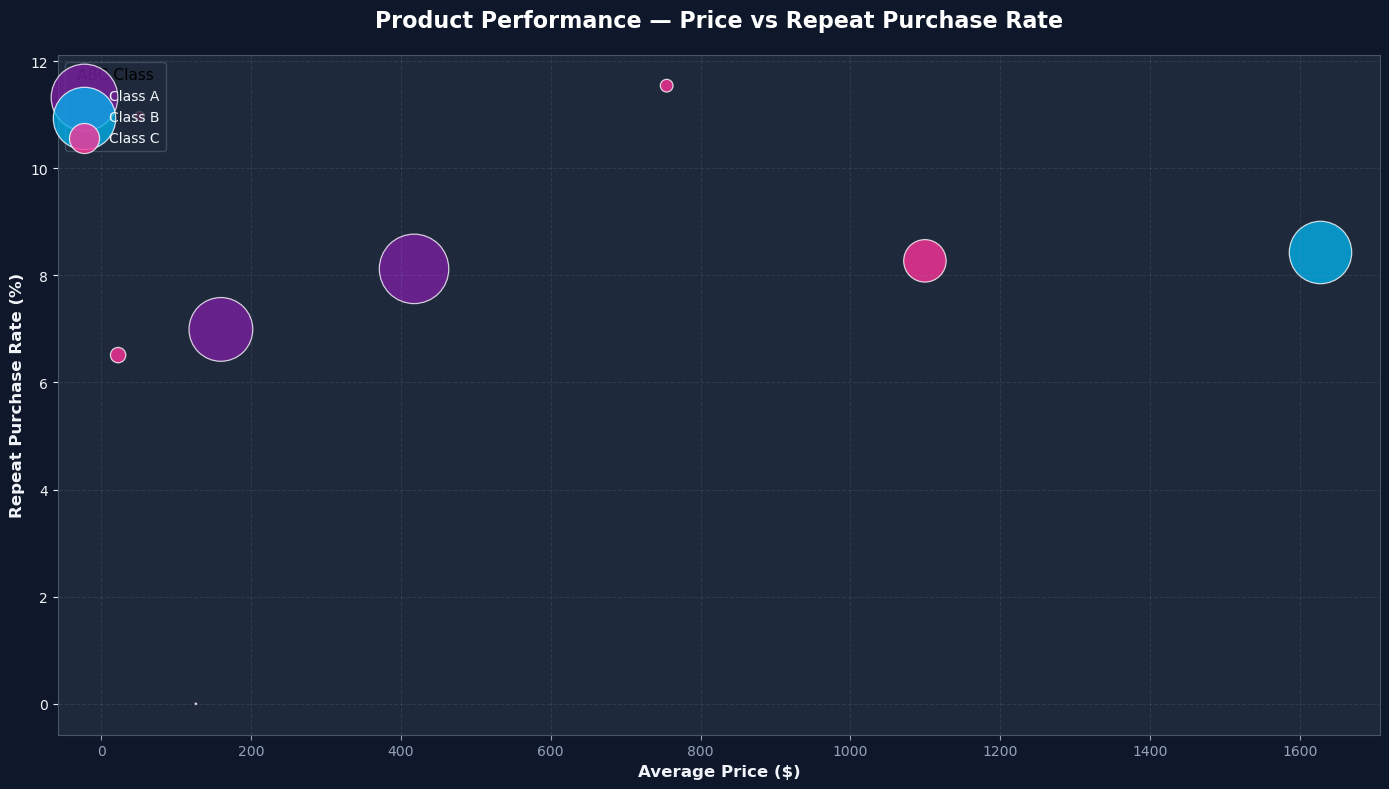

In [21]:
# ============================================================
# VERSION A — DARK DASHBOARD BUBBLE CHART (MATCHES PARETO THEME)
# ============================================================

import matplotlib.pyplot as plt
import numpy as np

# ---------------- THEME COLORS ----------------
FIG_BG   = "#0f172a"   # very dark slate
AX_BG    = "#1e293b"   # panel slate
TEXT_L   = "#f1f5f9"   # bright slate text
TEXT_M   = "#94a3b8"   # subtle
SPINE_B  = "#475569"   # faint borders

# ABC colors
abc_palette = {
    "A": "#7B1FA2",  # purple
    "B": "#03b2ed",  # cyan
    "C": "#FF3399"   # pink
}

def bubble_chart_dark(df):
    fig, ax = plt.subplots(figsize=(14, 8))
    fig.patch.set_facecolor(FIG_BG)
    ax.set_facecolor(AX_BG)

    # bubble sizes (scaled)
    sizes = (df["total_revenue"] / df["total_revenue"].max()) * 2500

    # plot each ABC class separately (for clean legend)
    for cls in ["A", "B", "C"]:
        subset = df[df["abc_class"] == cls]

        ax.scatter(
            subset["avg_price"],
            subset["rpr_%"],
            s=(subset["total_revenue"] / df["total_revenue"].max()) * 2500,
            color=abc_palette[cls],
            alpha=0.78,
            edgecolor="white",
            linewidth=0.9,
            label=f"Class {cls}"
        )

    # labels
    ax.set_title(
        "Product Performance — Price vs Repeat Purchase Rate",
        fontsize=16, fontweight="bold", color="white", pad=20
    )

    ax.set_xlabel("Average Price ($)", fontsize=12, fontweight="bold", color=TEXT_L)
    ax.set_ylabel("Repeat Purchase Rate (%)", fontsize=12, fontweight="bold", color=TEXT_L)

    ax.tick_params(axis='x', colors=TEXT_M)
    ax.tick_params(axis='y', colors=TEXT_L)

    # subtle grid
    ax.grid(True, linestyle='--', alpha=0.15, color=TEXT_M)

    # faint spines
    for spine in ax.spines.values():
        spine.set_color(SPINE_B)

    # legend
    leg = ax.legend(
        title="ABC Class",
        fontsize=10,
        title_fontsize=11,
        frameon=True,
        facecolor=AX_BG,
        edgecolor=SPINE_B,
        labelcolor=TEXT_L,
        loc="upper left"
    )

    plt.tight_layout()
    return fig

# Run it
fig = bubble_chart_dark(df)
plt.show()


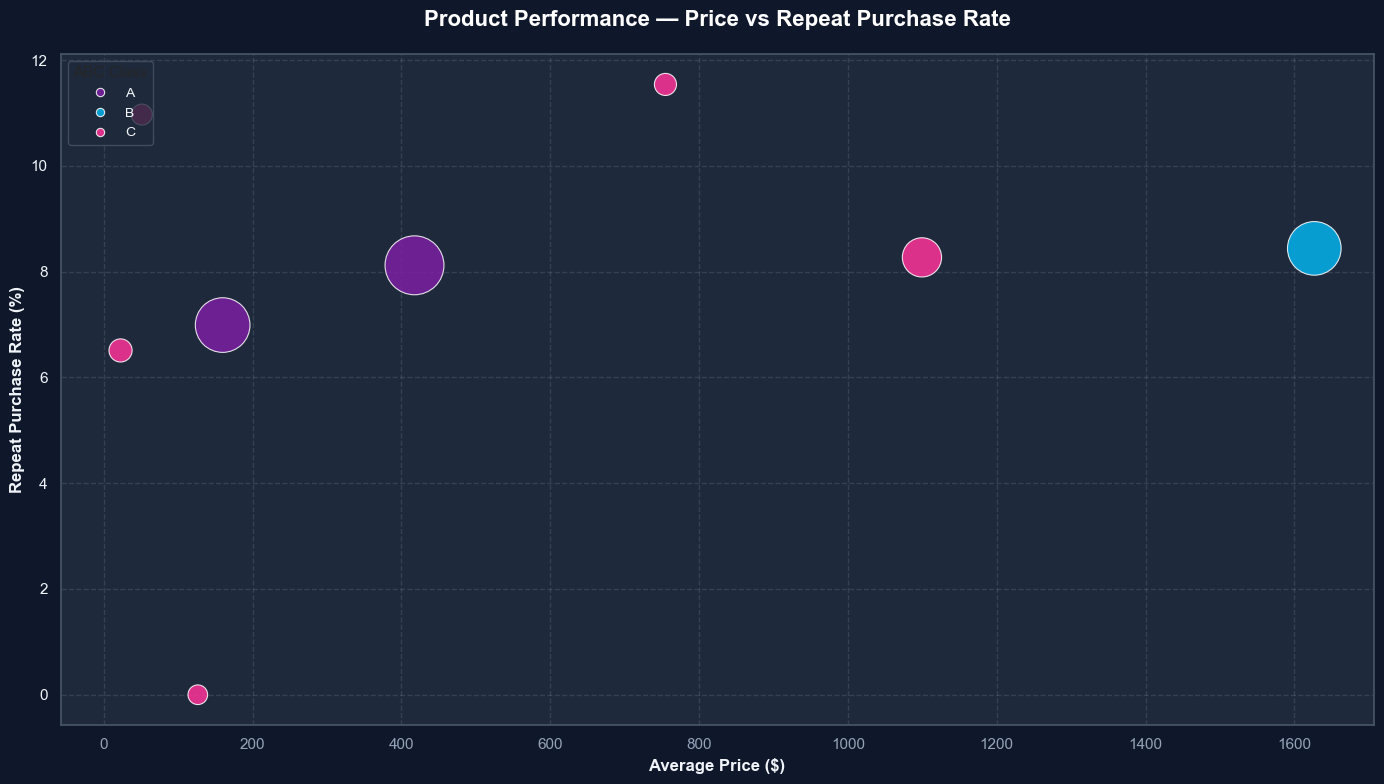

In [22]:
# ============================================================
# VERSION B — SEABORN + DARK THEME BUBBLE CHART
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns

FIG_BG   = "#0f172a"
AX_BG    = "#1e293b"
TEXT_L   = "#f1f5f9"
TEXT_M   = "#94a3b8"
SPINE_B  = "#475569"

palette = {
    "A": "#7B1FA2",
    "B": "#03b2ed",
    "C": "#FF3399"
}

def bubble_chart_seaborn(df):
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(14, 8))
    fig.patch.set_facecolor(FIG_BG)
    ax.set_facecolor(AX_BG)

    # seaborn scatter
    scatter = sns.scatterplot(
        data=df,
        x="avg_price",
        y="rpr_%",
        size="total_revenue",
        hue="abc_class",
        sizes=(200, 1800),
        palette=palette,
        alpha=0.85,
        edgecolor="white",
        linewidth=0.8,
        ax=ax
    )

    # fix legend to show only ABC
    handles, labels = ax.get_legend_handles_labels()
    filtered = [(h, l) for h, l in zip(handles, labels) if l in ["A", "B", "C"]]
    new_handles, new_labels = zip(*filtered)

    ax.legend(
        new_handles,
        new_labels,
        title="ABC Class",
        frameon=True,
        facecolor=AX_BG,
        edgecolor=SPINE_B,
        labelcolor=TEXT_L,
        title_fontsize=11,
        fontsize=10,
        loc="upper left"
    )

    # labels & title
    ax.set_title(
        "Product Performance — Price vs Repeat Purchase Rate",
        fontsize=16, fontweight="bold", color="white", pad=20
    )

    ax.set_xlabel("Average Price ($)", fontsize=12, fontweight="bold", color=TEXT_L)
    ax.set_ylabel("Repeat Purchase Rate (%)", fontsize=12, fontweight="bold", color=TEXT_L)

    ax.tick_params(axis='x', colors=TEXT_M)
    ax.tick_params(axis='y', colors=TEXT_L)

    # restyle grid
    ax.grid(True, alpha=0.20, linestyle='--', color=TEXT_M)

    # spine color
    for spine in ax.spines.values():
        spine.set_color(SPINE_B)

    plt.tight_layout()
    return fig

# Run it
fig = bubble_chart_seaborn(df)
plt.show()
